

### This is a kaggle notebook that will use data analytics tools and concepts to anaylse the cryptocurrency datasets. The first dataset consists of historical bitcoin prices from 2010 to 2021 as a csv file taken from the [top-50 historical prices dataset][1]. The [second dataset][2] has information on the transaction fees and minor reveune from 2009 to 2022

### Both datasets were resampled and shortened to have a sample range between 2018 and 2022. 

[1]: https://www.kaggle.com/datasets/odins0n/top-50-cryptocurrency-historical-prices
[2]: https://www.kaggle.com/datasets/muhammadkhoirulwiro/blockchain-transaction-and-miner-revenue

![Bitcoin logo][1]

[1]: https://upload.wikimedia.org/wikipedia/commons/thumb/4/46/Bitcoin.svg/480px-Bitcoin.svg.png

In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/transactionfeesandminerrevenue20182022/Transactions Fees and Miner Revenue(2018-2022).csv
/kaggle/input/bitcoinhistoricalprices/Bitcoin.csv


Import pyplot from **matplotlib** library to help with plotting graphs.

Using **pandas as pd**, both csv files are read and placed into variables as dataframes: bitcoindf and TFMR (**T**ransfer**F**ees&**M**iner**R**evenue)

One of the columns from bitcoindf 'SNo' is removed from the dataframe to make sure there is only one index column instead of two. 


In [2]:
import matplotlib.pyplot as plt

bitcoindf = pd.read_csv('../input/bitcoinhistoricalprices/Bitcoin.csv')
TFMR = pd.read_csv('../input/transactionfeesandminerrevenue20182022/Transactions Fees and Miner Revenue(2018-2022).csv')


bitcoindf = bitcoindf.drop(labels="SNo", axis=1)
bitcoindf.head()
TFMR = TFMR.rename(columns = {'Number of transactions' :  'Transactions', 
                       'Total value in USD of coinbase block rewards and transaction fees paid to miners.' : 'Block Rewards + Fees paid to miners (USD)',
                       'The total BTC value of all transaction fees paid to miners.' : 'Fees paid to miners (BTC)', 
                       'The total USD value of all transaction fees paid to miners.' : 'Fees paid to miners (USD)', 
                       'Average transaction fees in USD per transaction.' : 'Avg Fees per transaction (USD)',  
                       'miners revenue divided by the number of transactions (usd)' : 'Revenue/Transactions (USD)'})

Bitcoin dataframe and 'Transactionfees&MinersRevenue' dataframe are merged based on the same recorded dates.  
Columns are renamed from the 'Bitcoin' dataframe to make it clear that it is the Bitcoin prices/opens etc that are being looked at

In [3]:
TFMR.head()

,Date,month,day,year,Transactions,Block Rewards + Fees paid to miners (USD),Fees paid to miners (BTC),Fees paid to miners (USD),Avg Fees per transaction (USD),Revenue/Transactions (USD)
0,03/01/2018,1,3,2018,288429056,41037010.87,749.685473,1.132484e+07,28.276123,102.462144
1,06/01/2018,1,6,2018,289592587,46563789.98,694.477906,1.157201e+07,32.247758,129.759452
2,09/01/2018,1,9,2018,290665709,43234479.12,752.418203,1.161368e+07,30.999893,115.403963
3,12/01/2018,1,12,2018,291709927,38771602.28,617.635794,8.444052e+06,28.138306,129.199484
4,15/01/2018,1,15,2018,292512025,33038806.92,510.117618,7.067806e+06,25.830452,120.745723


In [4]:
merged_df = TFMR.merge(bitcoindf, how="inner", on=['Date'])
merged_df = merged_df.rename(columns = {'Price' : 'Bitcoin Price', 'Open' : 'Bitcoin Open', 'High': 'Bitcoin High', 'Low' : 'Bitcoin Low'})
merged_df = merged_df.rename(columns = {'Number of transactions' :  'Transactions', 
                       'Total value in USD of coinbase block rewards and transaction fees paid to miners.' : 'Block Rewards + Fees paid to miners (USD)',
                       'The total BTC value of all transaction fees paid to miners.' : 'Fees paid to miners (BTC)', 
                       'The total USD value of all transaction fees paid to miners.' : 'Fees paid to miners (USD)', 
                       'Average transaction fees in USD per transaction.' : 'Avg Fees per transaction (USD)',  
                       'miners revenue divided by the number of transactions (usd)' : 'Revenue/Transactions (USD)'} )

In [5]:
merged_df.head()

,Date,month,day,year,Transactions,Block Rewards + Fees paid to miners (USD),Fees paid to miners (BTC),Fees paid to miners (USD),Avg Fees per transaction (USD),Revenue/Transactions (USD),Bitcoin Price,Bitcoin Open,Bitcoin High,Bitcoin Low,Vol.,Change %
0,03/01/2018,1,3,2018,288429056,41037010.87,749.685473,1.132484e+07,28.276123,102.462144,15156.6,14754.1,15435.0,14579.7,106540,2.73
1,06/01/2018,1,6,2018,289592587,46563789.98,694.477906,1.157201e+07,32.247758,129.759452,17172.3,16954.8,17252.8,16286.6,83930,1.28
2,09/01/2018,1,9,2018,290665709,43234479.12,752.418203,1.161368e+07,30.999893,115.403963,14778.5,14976.2,15324.6,14613.4,71400,-1.32
3,12/01/2018,1,12,2018,291709927,38771602.28,617.635794,8.444052e+06,28.138306,129.199484,13886.7,13529.2,14176.4,13410.0,82370,2.60
4,15/01/2018,1,15,2018,292512025,33038806.92,510.117618,7.067806e+06,25.830452,120.745723,13697.5,13695.5,14396.6,13475.4,73270,0.02


### Explanation of new columns
Bitcoin Open - Opening price of bitcoin on the day

Bitcoin High - Highest price of bitcoin on the day 

Bitcoin Low - Lowest price of bitcoin on the day

Vol - Volume of Bitcoin transactions on the day

Percentage Change from previous day ()

## Rolling functions applied on the merged database
### Figure 1 - Rolling 3-day standard deviation
### Figure 2 - 50-day moving averages
### Figure 3 - 100-day moving averages

In [6]:
merged_df['Rolling Open Standard Deviation'] = merged_df['Bitcoin Open'].rolling(2).std()
merged_df['50 day moving average'] = merged_df['Bitcoin Price'].rolling(17).mean()
merged_df['100 day moving average'] = merged_df['Bitcoin Price'].rolling(67).mean()
merged_df.head()


,Date,month,day,year,Transactions,Block Rewards + Fees paid to miners (USD),Fees paid to miners (BTC),Fees paid to miners (USD),Avg Fees per transaction (USD),Revenue/Transactions (USD),Bitcoin Price,Bitcoin Open,Bitcoin High,Bitcoin Low,Vol.,Change %,Rolling Open Standard Deviation,50 day moving average,100 day moving average
0,03/01/2018,1,3,2018,288429056,41037010.87,749.685473,1.132484e+07,28.276123,102.462144,15156.6,14754.1,15435.0,14579.7,106540,2.73,NaN,NaN,NaN
1,06/01/2018,1,6,2018,289592587,46563789.98,694.477906,1.157201e+07,32.247758,129.759452,17172.3,16954.8,17252.8,16286.6,83930,1.28,1556.129893,NaN,NaN
2,09/01/2018,1,9,2018,290665709,43234479.12,752.418203,1.161368e+07,30.999893,115.403963,14778.5,14976.2,15324.6,14613.4,71400,-1.32,1399.081477,NaN,NaN
3,12/01/2018,1,12,2018,291709927,38771602.28,617.635794,8.444052e+06,28.138306,129.199484,13886.7,13529.2,14176.4,13410.0,82370,2.60,1023.183512,NaN,NaN
4,15/01/2018,1,15,2018,292512025,33038806.92,510.117618,7.067806e+06,25.830452,120.745723,13697.5,13695.5,14396.6,13475.4,73270,0.02,117.591858,NaN,NaN


In [7]:
# 50  - 02/06/2018
# 100 - 30/10/2018
# 150 - 29/03/2019
# 200 - 26/08/2019
# 250 - 23/01/2020
# 300 - 21/06/2020
# 350 - 18/11/2020
# 400 - 17/04/2021

### Rolling functions plotted on line graphs

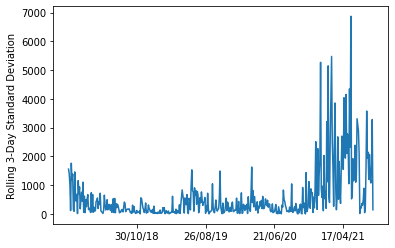

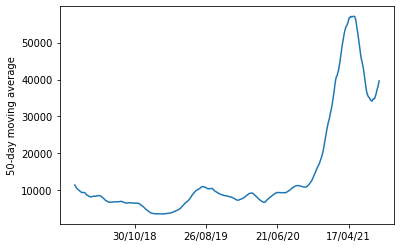

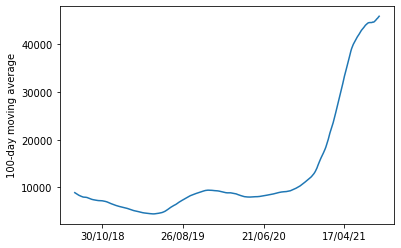

In [8]:
x = [100,200,300,400]
labels = ['30/10/18', '26/08/19', '21/06/20', '17/04/21']

plt.plot(merged_df['Rolling Open Standard Deviation'])
plt.ylabel("Rolling 3-Day Standard Deviation")
plt.xticks(x,labels)
plt.show()
plt.plot(merged_df['50 day moving average'])
plt.ylabel("50-day moving average")
plt.xticks(x,labels)
plt.show()
plt.plot(merged_df['100 day moving average'])
plt.ylabel("100-day moving average")
plt.xticks(x,labels)
plt.show()


In [9]:

Y18 = TFMR.loc[TFMR['year'] == 2018]
Y19 = TFMR.loc[TFMR['year'] == 2019]
Y20 = TFMR.loc[TFMR['year'] == 2020]
Y21 = TFMR.loc[TFMR['year'] == 2021]
Y22 = TFMR.loc[TFMR['year'] == 2022]

### 5 graphs showing the change in average transaction fees (USD) over time for years 2018-2022

Text(0.5, 1.0, '2022')

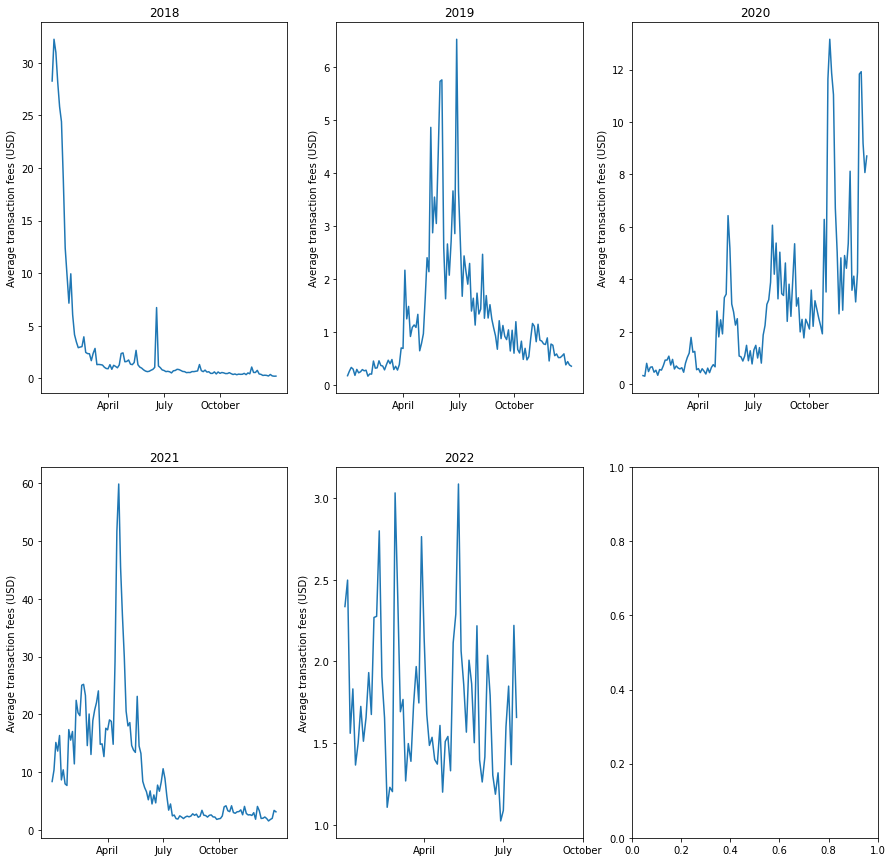

In [10]:
#Change in transaction fees in USD compared each year
figure, axis = plt.subplots(2,3, figsize=(15,15))

x = [30,60,90]
labels = ['April', 'July', 'October'] 

axis[0,0].plot(Y18['Date'], Y18['Avg Fees per transaction (USD)'])
axis[0,0].set_xticks(x,labels)
axis[0,0].set_ylabel("Average transaction fees (USD)")
axis[0,0].set_title("2018")

axis[0,1].plot(Y19['Date'], Y19['Avg Fees per transaction (USD)'])
axis[0,1].set_xticks(x,labels)
axis[0,1].set_ylabel("Average transaction fees (USD)")
axis[0,1].set_title("2019")

axis[0,2].plot(Y20['Date'], Y20['Avg Fees per transaction (USD)'])
axis[0,2].set_xticks(x,labels)
axis[0,2].set_ylabel("Average transaction fees (USD)")
axis[0,2].set_title("2020")

axis[1,0].plot(Y21['Date'], Y21['Avg Fees per transaction (USD)'])
axis[1,0].set_xticks(x,labels)
axis[1,0].set_ylabel("Average transaction fees (USD)")
axis[1,0].set_title("2021")

axis[1,1].plot(Y22['Date'], Y22['Avg Fees per transaction (USD)'])
axis[1,1].set_xticks(x,labels)
axis[1,1].set_ylabel("Average transaction fees (USD)")
axis[1,1].set_title("2022")

# DBSCAN clustering. A density based clustering algorithm designed to handle noise and detect outliers

### DBSCAN module imported to use as an analytic tool for unsupervised learning to find patterns
### Linear Regression module imported as a type of predictive analysis to model relationships and describe data

### These tools will look at the relationship between the Transaction fees (USD) and the price of Bitcoin on that given day.

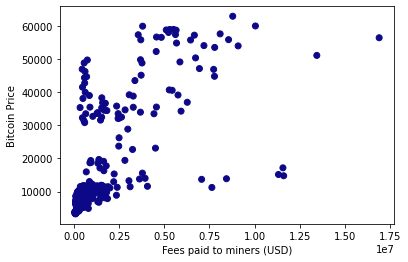

In [11]:
from sklearn.cluster import DBSCAN
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression

x = merged_df.loc[:,['Fees paid to miners (USD)', 'Bitcoin Price']].values
eps = 5
dbscan = DBSCAN(eps=eps, min_samples = 4).fit(x)
labels = dbscan.labels_

plt.scatter(x[:,0], x[:,1], c=labels, cmap="plasma")
plt.xlabel("Fees paid to miners (USD)")
plt.ylabel("Bitcoin Price")
plt.show()

### Application of Linear Regression on the previous DBSCAN

In [12]:
TFMR_transaction = merged_df[['Fees paid to miners (USD)','Bitcoin Price']]
TFMR_transaction.columns = ['AvgFee','Bitcoin Price']


# Drop first row to make number of rows 552 instead of 553 to satisfy train_test_split
TFMR_transaction = TFMR_transaction.iloc[1:, :]
TFMR_transaction.fillna(method ='ffill', inplace = True)

X = np.array(TFMR_transaction['AvgFee']).reshape(-1,1)
y = np.array(TFMR_transaction['Bitcoin Price']).reshape(-1,1)

X_train, x_test, y_train , y_test = train_test_split(X, y, test_size=0.5)
reg = LinearRegression()
reg.fit(X_train, y_train)
print(reg.score(x_test,y_test))

0.5432329878837572


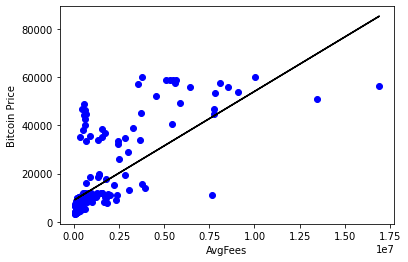

In [13]:
y_pred = reg.predict(x_test)
plt.scatter(x_test,y_test, color='b')
plt.xlabel("AvgFees")
plt.ylabel("Bitcoin Price")
plt.plot(x_test,y_pred, color='k')

plt.show()

### Retrieve p-values using the statsmodels api for the linear regression

In [14]:

import statsmodels.api as sm
X = sm.add_constant(X)
model = sm.OLS(y,X)
results = model.fit()
print("p values: ")
for x in range(0,2):
    print(results.pvalues[x])
print(results.summary())



p values: 
1.6933638329601957e-44
6.570367742427442e-69
                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.503
Model:                            OLS   Adj. R-squared:                  0.502
Method:                 Least Squares   F-statistic:                     445.9
Date:                Mon, 28 Nov 2022   Prob (F-statistic):           6.57e-69
Time:                        13:12:53   Log-Likelihood:                -4722.1
No. Observations:                 443   AIC:                             9448.
Df Residuals:                     441   BIC:                             9456.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------

# Summary

**coef** - shows the coefficient for each independent variable and intercept variable

**std error/t** - An estimate of the standard deviation of the corresponding variable's coefficient across all data points. 


**P>t** - How likely is it that the coefficient is measured through the model by chance? 

- The p-value of the variable (Fees paid to miners(USD)) is <0.05 (critical limit) which shows that this is a statistically significant



**Rsquared** - quality of the model fit - How much the independent variable is explained by the changes in the dependent variable
i.e a Rsquared value of 0.503 means that the model can explain 50.3% of the change in the dependent variable ()


**F-statistic** - Examines whether the group of variables is *statistically significant* by comparing this model with another model where the effect of the variables are reduced to 0.




#### With p-values being so small and below the critical limit, the null hypothesis(results are completely random) can be rejected and the idea that the change in transaction fees had a significant impact on the price of Bitcoin 


# K-Means Clustering

### A type of unsupervised learning algorithm that groups data based on each point's euclidean distance to a central point (centroid)
### It also partitions all points in the sample based on similarity (calculated by the euclidean distance)
#### Seaborn will be used to plot the colour coded clusters 
## Method 1
#### An elbow method will be used to help indicate how many clusters there are within the data

(444, 19)


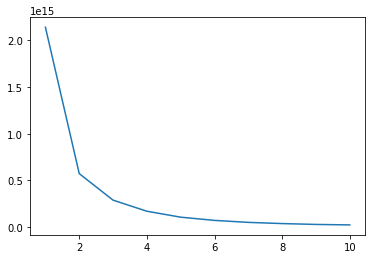

In [15]:
from sklearn.cluster import KMeans
from sklearn import metrics
import seaborn as sns

df = merged_df
print(df.shape)
df = df[['Fees paid to miners (USD)', 'Bitcoin Price']]

wcss = []

for i in range(1, 11):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss.append(clustering.inertia_)
    
ks = [1, 2, 3, 4, 5, 6, 7, 8, 9, 10]
sns.lineplot(x = ks, y = wcss);



##### The above plot shows a line graph that resembles an 'elbow' , that bends first at 2 then bends once again at 3. Indictating that there should be either 2 or 3 clusters in the data 

In [16]:
wcss_3 = []

for i in range(1, 4):
    clustering = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering.fit(df)
    wcss_3.append(clustering.inertia_)
    



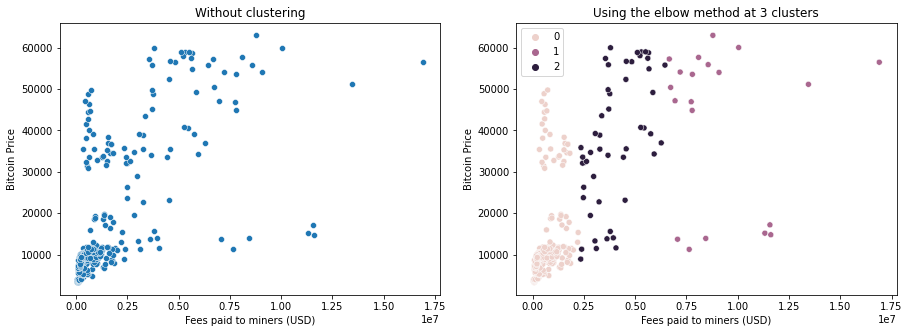

In [17]:
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Fees paid to miners (USD)', y='Bitcoin Price').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Fees paid to miners (USD)', y='Bitcoin Price', hue=clustering.labels_).set_title('Using the elbow method at 3 clusters');

##### The 2nd plot shows the locations of the three clusters

##### The 'legend' shows the colours of the three different clusters. 

## Method 2 Silhouette Analysis

In [18]:
from sklearn.metrics import silhouette_score
score = silhouette_score(df, clustering.labels_, metric='euclidean')
print("Silhouette score: %3f" % score )


Silhouette score: 0.789945


### Analyzing the Silhouette Score
- 1 : Samples are close to each other in their own clusters & seperate clusters are far away from each other
- 0 : Clusters are indifferent. Clusters are **overlapping** and in some cases, the samples are very close to the boundary of neighbouring clusters
- -1 : Samples might have been assigned to the wrong clusters



##### A silhouette score of 0.79 shows that the 3 clusters are of a significant distance away. Only a few samples are very close to each other.  

##### What score will be calculated with 2 clusters or 4 clusters?


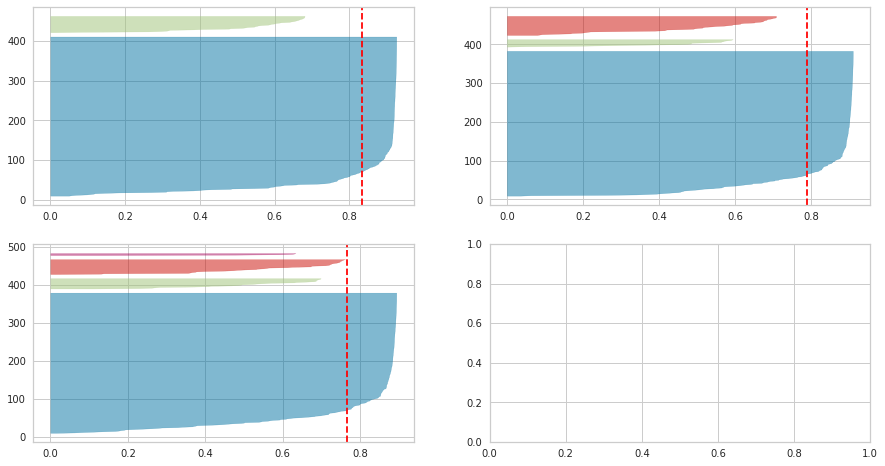

In [19]:
from yellowbrick.cluster import SilhouetteVisualizer
 
fig, ax = plt.subplots(2, 2, figsize=(15,8))
for i in [2, 3, 4]:
    '''
    Create KMeans instance for different number of clusters
    '''
    km = KMeans(n_clusters=i, init='k-means++', n_init=10, max_iter=100, random_state=42)
    q, mod = divmod(i, 2)
    '''
    Create SilhouetteVisualizer instance with KMeans instance
    Fit the visualizer
    '''
    visualizer = SilhouetteVisualizer(km, colors='yellowbrick', ax=ax[q-1][mod])
    visualizer.fit(df) 

##### A Silhouette visualizer with 2, 3 and 4 clusters shown 

##### Dotted red line = Average Silhouette score

### With 4 clusters , the average silhouette score falls lower than the previous 0.79. This means that adding an additional cluster could make some samples overlap with each other and we move further away from the optimal number of clusters

### The highest average silhouette score is shown on the graph with only 2 clusters at >0.8. This visulaizer shows me that the optimum number of clusters in this data package is 2.

[1] : https://vitalflux.com/kmeans-silhouette-score-explained-with-python-example/#:~:text=Silhouette%20score%20is%20used%20to,each%20sample%20of%20different%20clusters.

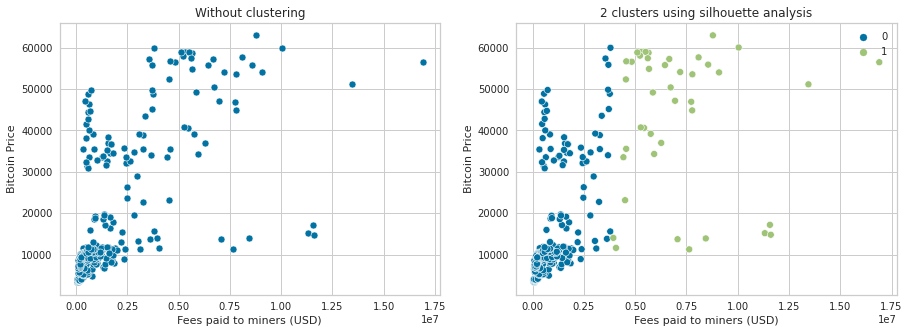

In [20]:
wcss_2 = []

for i in range(1, 3):
    clustering2 = KMeans(n_clusters=i, init='k-means++', random_state=42)
    clustering2.fit(df)
    wcss_2.append(clustering2.inertia_)

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15,5))
sns.scatterplot(ax=axes[0], data=df, x='Fees paid to miners (USD)', y='Bitcoin Price').set_title('Without clustering')
sns.scatterplot(ax=axes[1], data=df, x='Fees paid to miners (USD)', y='Bitcoin Price', hue=clustering2.labels_).set_title('2 clusters using silhouette analysis');